In [1]:
import pandas as pd
import matplotlib.pyplot as plt
emp=[]
# Define the file path
file_path = 'C:/Users/Pc/Desktop/simu.txt'
data = pd.read_csv(file_path, header = None)
for a in range(1,len(data)):
    tmp=[a for a in data.iloc[a][0].split(' ') if a != '']
    emp.append(tmp)
    #print(tmp)
    #emp.append(tmp)
emp=pd.DataFrame(emp)
emp
#print(data.iloc[0][0])
#print(data.iloc[1][0])

,0,1,2,3,4,5,6,7,8,9,...,52,53,54,55,56,57,58,59,60,61
0,1.00e-09,1.80e+00,1.00e-09,1.80e+00,1.00e-09,1.80e+00,1.00e-09,1.80e+00,1.00e-09,1.80e+00,...,1.00e-09,1.80e+00,1.00e-09,1.80e+00,1.00e-09,1.80e+00,1.00e-09,1.80e+00,1.00e-09,1.80e+00
1,1.04e-09,1.80e+00,1.04e-09,1.80e+00,1.04e-09,1.80e+00,1.04e-09,1.80e+00,1.04e-09,1.80e+00,...,1.04e-09,1.80e+00,1.04e-09,1.80e+00,1.04e-09,1.80e+00,1.04e-09,1.80e+00,1.04e-09,1.80e+00
2,1.11e-09,1.80e+00,1.11e-09,1.80e+00,1.11e-09,1.80e+00,1.11e-09,1.80e+00,1.11e-09,1.80e+00,...,1.11e-09,1.80e+00,1.11e-09,1.80e+00,1.11e-09,1.80e+00,1.11e-09,1.80e+00,1.11e-09,1.80e+00
3,1.26e-09,1.80e+00,1.26e-09,1.80e+00,1.26e-09,1.80e+00,1.26e-09,1.80e+00,1.26e-09,1.80e+00,...,1.26e-09,1.80e+00,1.26e-09,1.80e+00,1.26e-09,1.80e+00,1.26e-09,1.80e+00,1.26e-09,1.80e+00
4,1.55e-09,1.80e+00,1.55e-09,1.80e+00,1.55e-09,1.80e+00,1.55e-09,1.80e+00,1.55e-09,1.80e+00,...,1.55e-09,1.80e+00,1.55e-09,1.80e+00,1.55e-09,1.80e+00,1.55e-09,1.80e+00,1.55e-09,1.80e+00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
523,5.00e-05,-5.92e-04,4.98e-05,-6.98e-06,4.99e-05,4.86e-05,5.00e-05,1.80e+00,5.00e-05,2.65e-04,...,None,None,None,None,None,None,None,None,None,None
524,4.99e-05,4.53e-05,5.00e-05,-5.19e-05,5.00e-05,1.69e-04,5.00e-05,7.05e-05,4.97e-05,-1.76e-05,...,None,None,None,None,None,None,None,None,None,None
525,5.00e-05,-1.10e-05,5.00e-05,4.57e-05,4.98e-05,4.85e-06,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
526,4.99e-05,-1.72e-05,None,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None


In [2]:
x=[]
y=[]
for a in range(len(emp.columns)):
    if a % 2 == 0:
        # Even column index, add data points to x
        x.append(emp.iloc[:, a].values.astype(float))
    else:
        # Odd column index, add data points to y
        y.append(emp.iloc[:, a].values.astype(float))

## ploteo de las salidas de impulsos, es opcional ##

C:\Users\Pc\AppData\Local\Temp\ipykernel_13916\936547361.py:2: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  plt.figure()


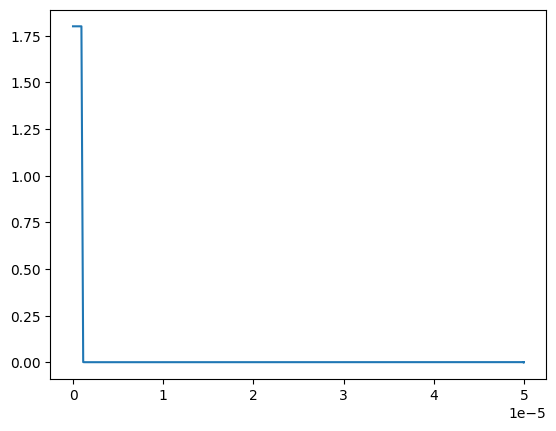

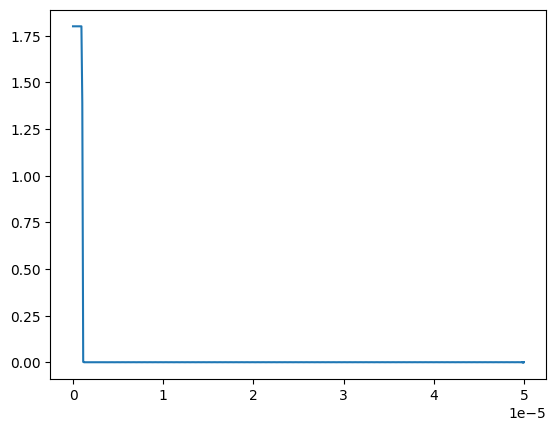

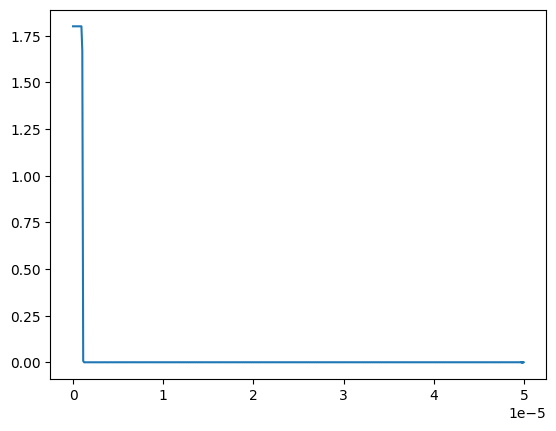

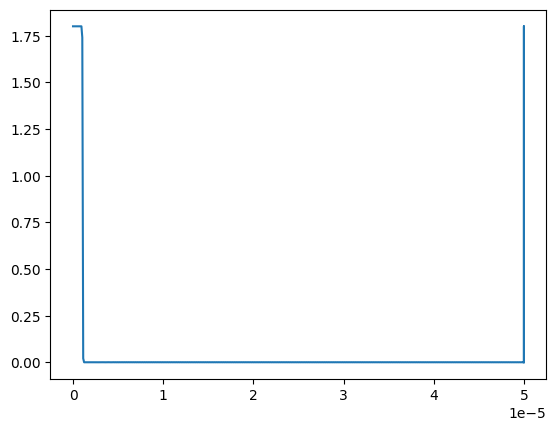

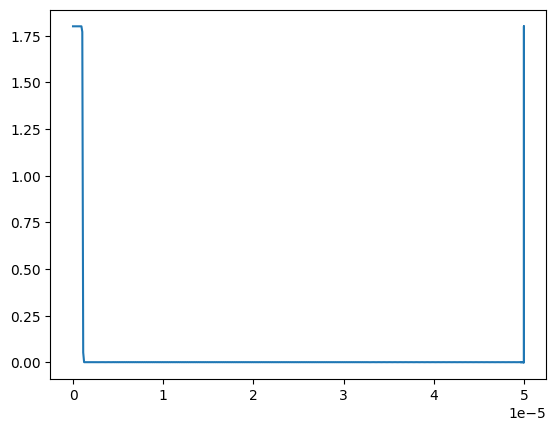

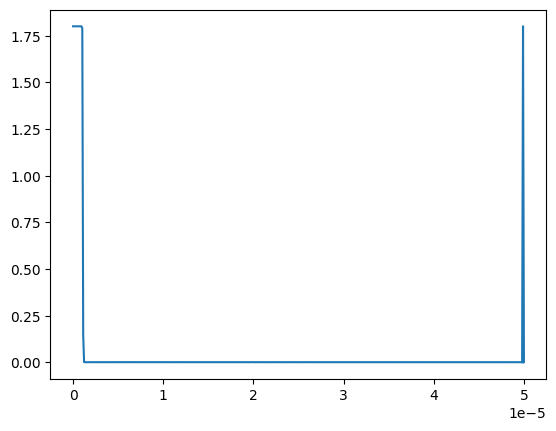

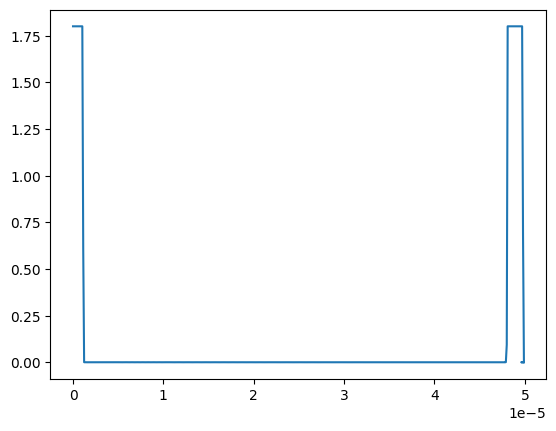

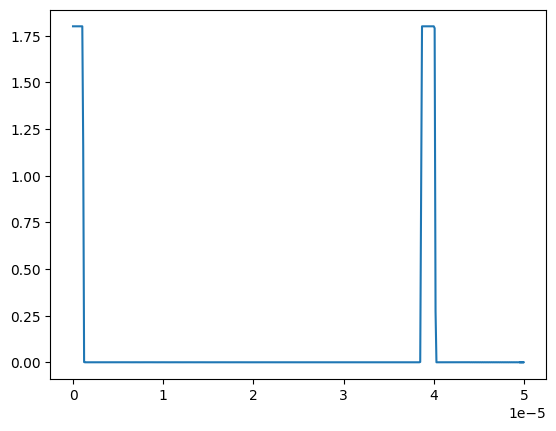

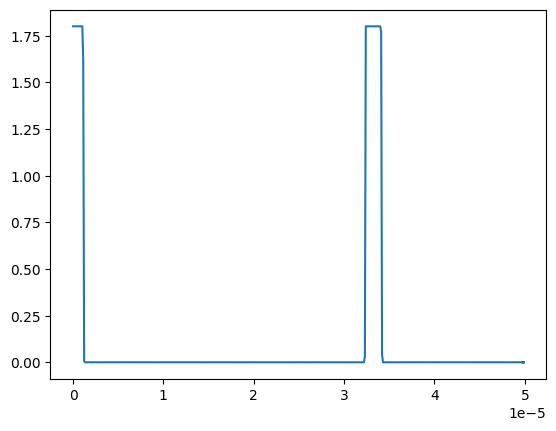

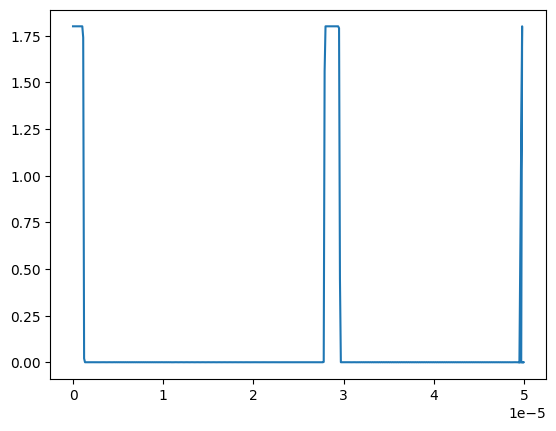

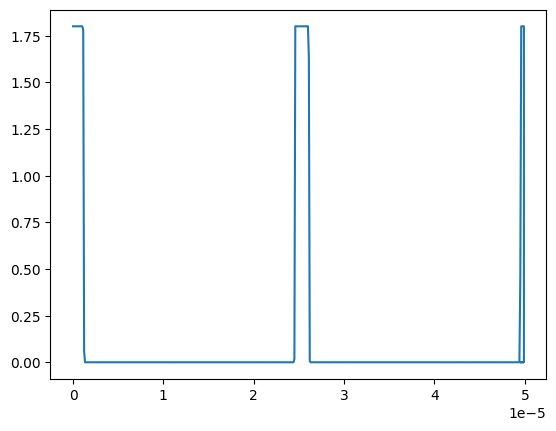

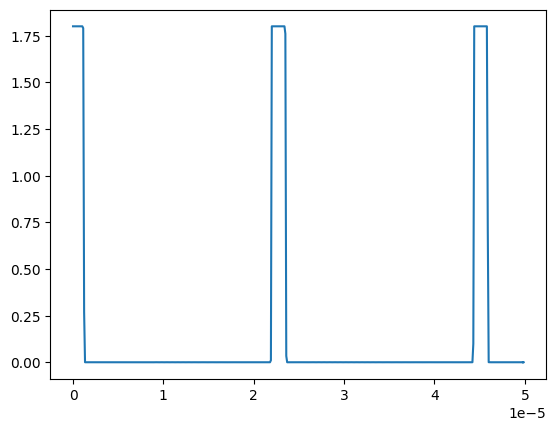

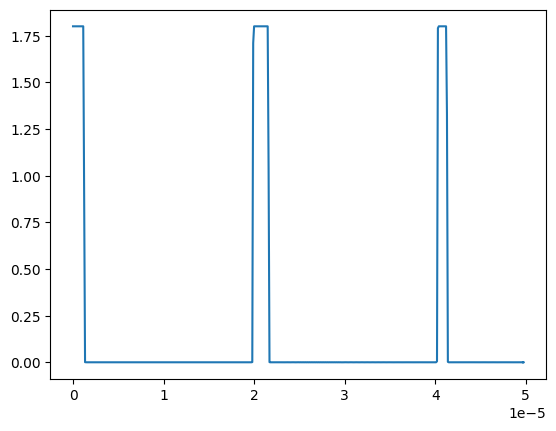

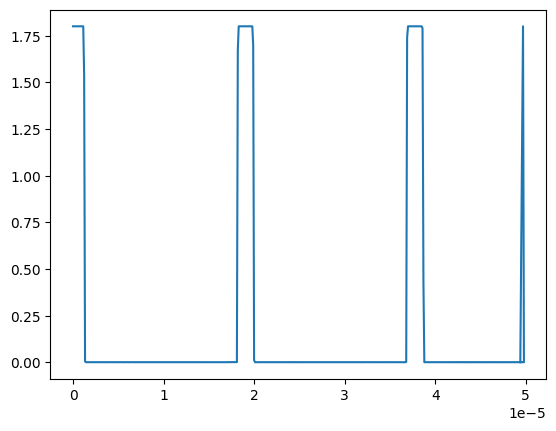

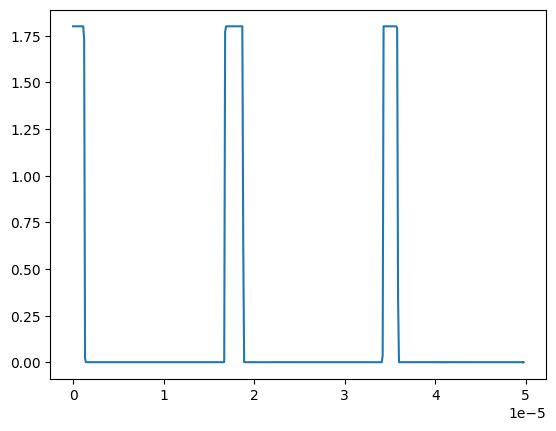

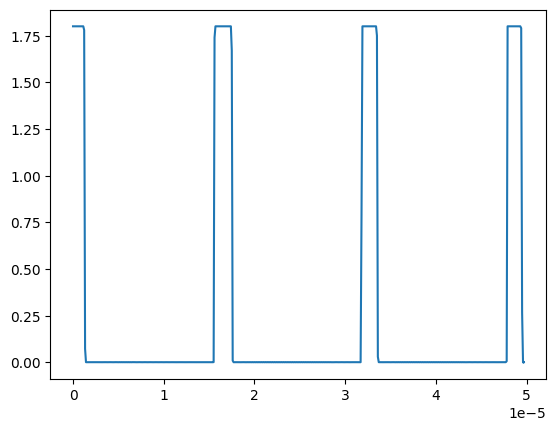

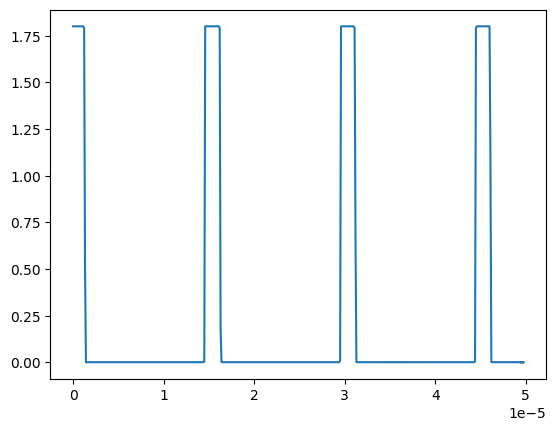

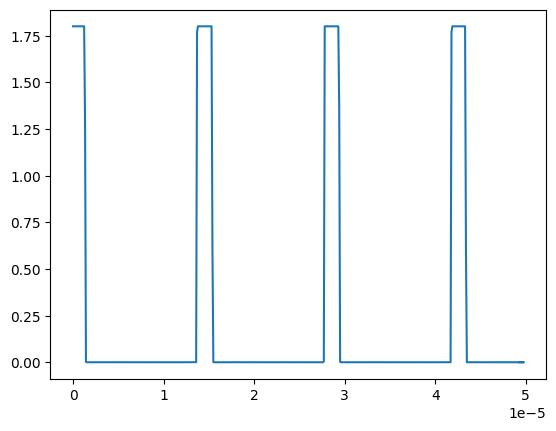

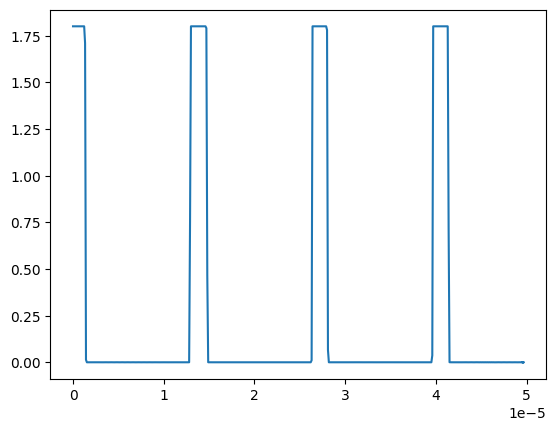

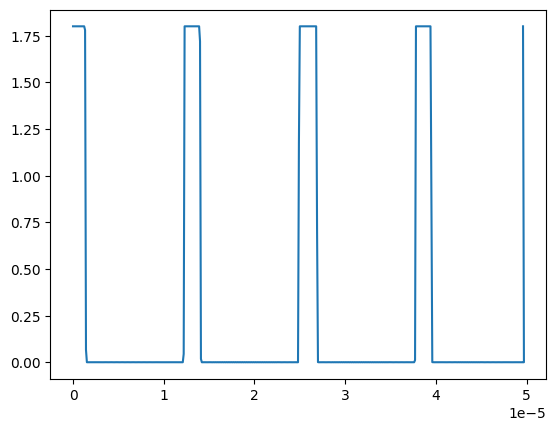

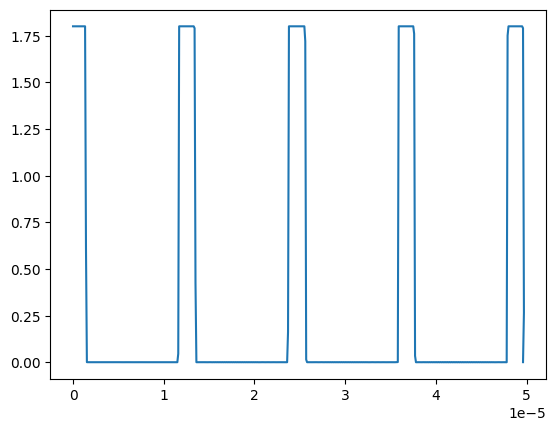

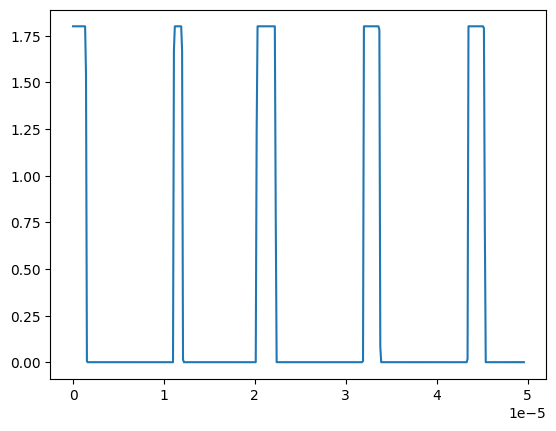

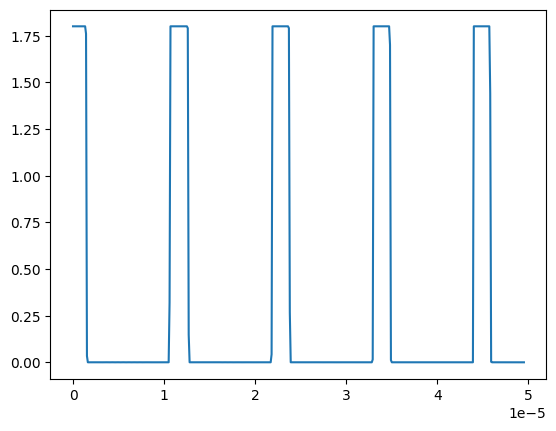

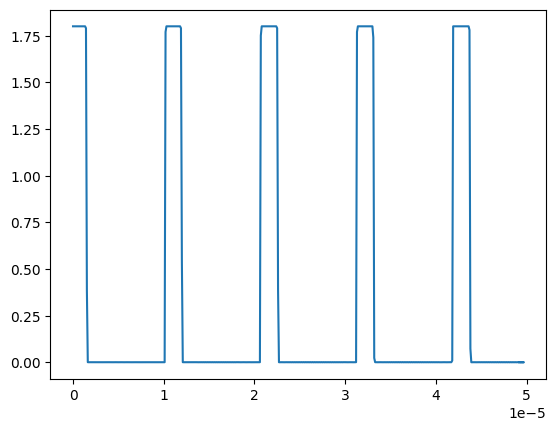

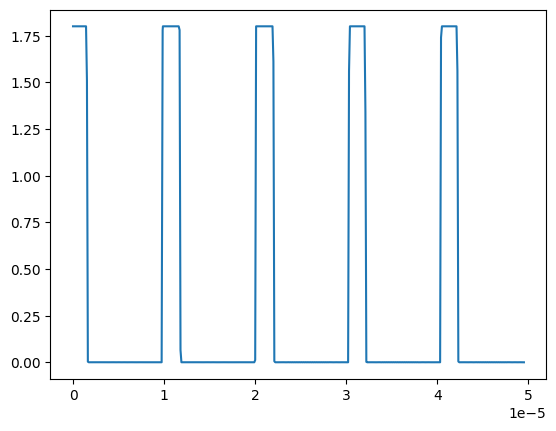

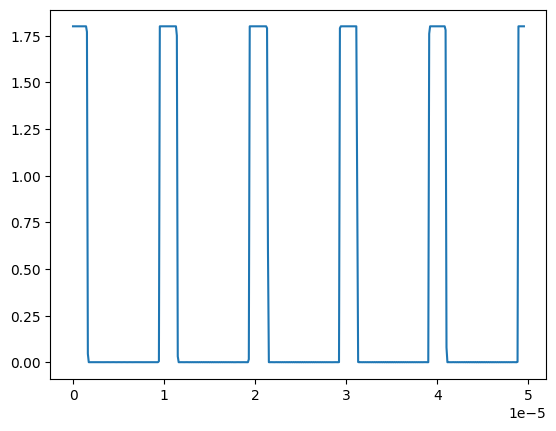

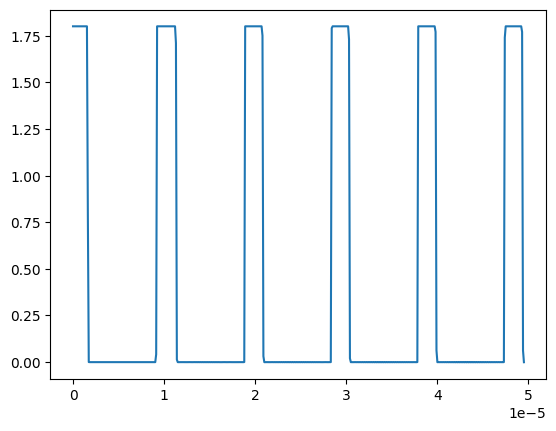

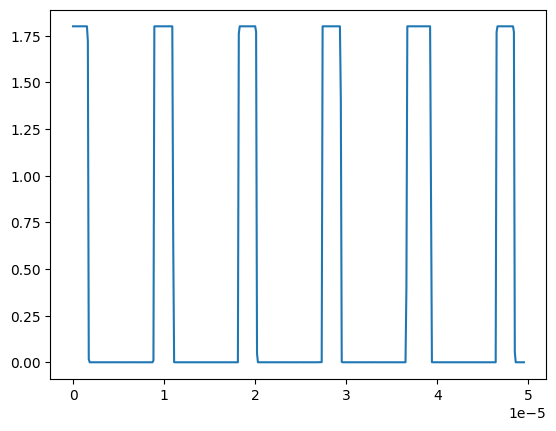

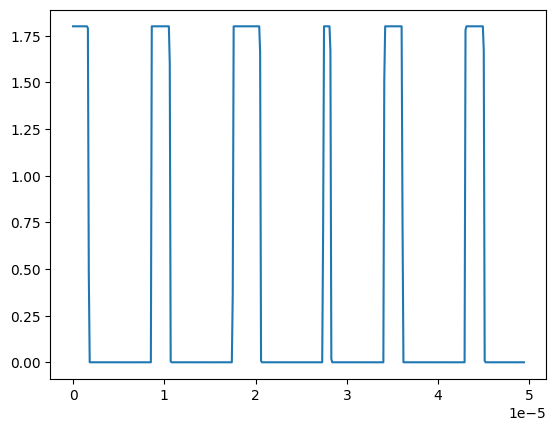

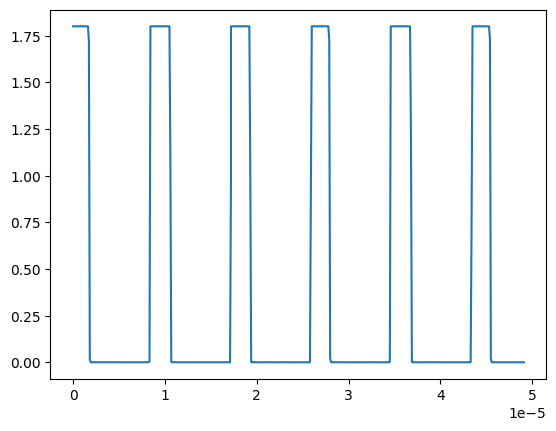

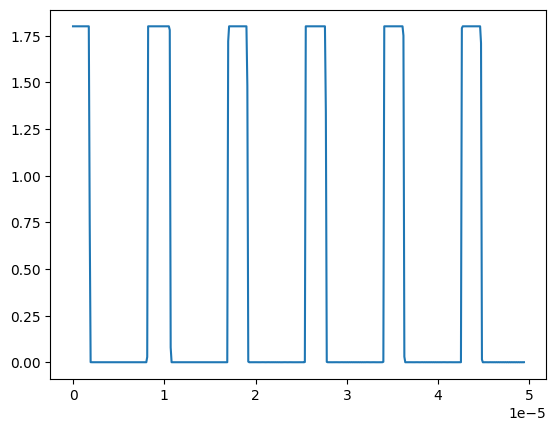

In [9]:
#for a in zip(x,y):
#    plt.figure()
#    plt.plot(a[0],a[1])

In [28]:
new_arra=[]
for a in y:
    result = [True if a >= 1.65 else False for a in a]
    #plt.plot(result)
    index=[]
    for b in range(len(result)-1):
        if result[b] == 1 and result[b+1] == 0:
            index.append(True)
        else:
            index.append(False)
    new_arra.append(index)

In [41]:
mask=new_arra[30]
y[9][:-1][mask]

array([-2.03e-05, -1.10e-04,  7.84e-05,  1.56e+00, -3.36e-04, -2.01e-04])

In [52]:
vals=[]
for a in range(len(y)):
    mask=new_arra[a]
    vari=x[a][:-1][mask]
    print('Time between spikes for the {}th simulation is {}'.format(a+1,vari))
    if len(vari)>=2:
        tm_diff=vari[-1]-vari[-2]
        vals.append(1/tm_diff)
        print(f"Spike frequency of the impulses is {1/tm_diff}")
    else:
        print('No spikes detected')
        vals.append(0)
    

Time between spikes for the 1th simulation is [9.33e-07]
No spikes detected
Time between spikes for the 2th simulation is [9.33e-07]
No spikes detected
Time between spikes for the 3th simulation is [1.03e-06]
No spikes detected
Time between spikes for the 4th simulation is [1.03e-06 5.00e-05]
Spike frequency of the impulses is 20420.665713702267
Time between spikes for the 5th simulation is [1.03e-06 5.00e-05]
Spike frequency of the impulses is 20420.665713702267
Time between spikes for the 6th simulation is [1.03e-06 4.99e-05]
Spike frequency of the impulses is 20462.45140167792
Time between spikes for the 7th simulation is [1.03e-06 4.97e-05]
Spike frequency of the impulses is 20546.53790836244
Time between spikes for the 8th simulation is [1.03e-06 4.01e-05]
Spike frequency of the impulses is 25595.08574353724
Time between spikes for the 9th simulation is [1.03e-06 3.41e-05]
Spike frequency of the impulses is 30238.88720895071
Time between spikes for the 10th simulation is [1.13e-06

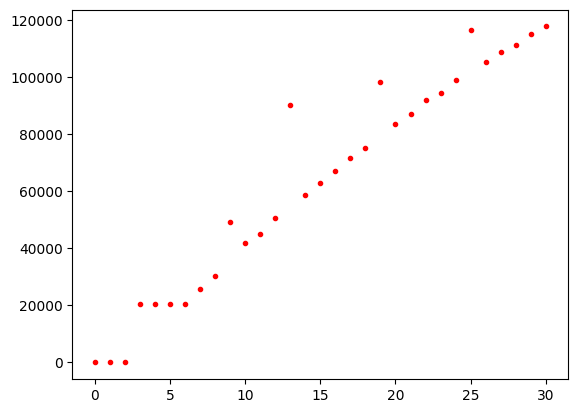

In [53]:
plt.plot(vals,'r.')